In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import compose
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [55]:
df_all = pd.read_csv('df_all.csv', index_col=0)
y1 = df_all.SalePrice
X1 = df_all.drop(['SalePrice', 'PID'], axis =1).copy()

df_all_normal = pd.read_csv('df_all_normal.csv', index_col=0)
y2 = df_all_normal.SalePrice
X2 = df_all_normal.drop(['SalePrice', 'PID'], axis =1).copy()

df_faa = pd.read_csv('df_faa.csv', index_col=0)
y3 = df_faa.SalePrice
X3 = df_faa.drop(['SalePrice', 'PID'], axis =1).copy()

df_normal_quality = pd.read_csv('df_normal_quality.csv', index_col=0)
y4 = df_normal_quality.SalePrice
X4 = df_normal_quality.drop(['SalePrice', 'PID'], axis =1).copy()

df_quality = pd.read_csv('df_quality.csv', index_col=0)
y5 = df_quality.SalePrice
X5 = df_quality.drop(['SalePrice', 'PID'], axis =1).copy()

df_some_quality = pd.read_csv('df_some_quality.csv', index_col=0)
y6 = df_some_quality.SalePrice
X6 = df_some_quality.drop(['SalePrice', 'PID'], axis =1).copy()

df = pd.read_csv('df.csv', index_col=0)
y7 = df.SalePrice
X7 = df.drop(['SalePrice', 'PID'], axis =1).copy()

## Multiple Linear Regression

In [102]:
X4.SaleType.value_counts()

SaleType
WD       2248
COD        38
ConLD      20
CWD        10
ConLw       6
ConLI       5
Con         4
Oth         1
VWD         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

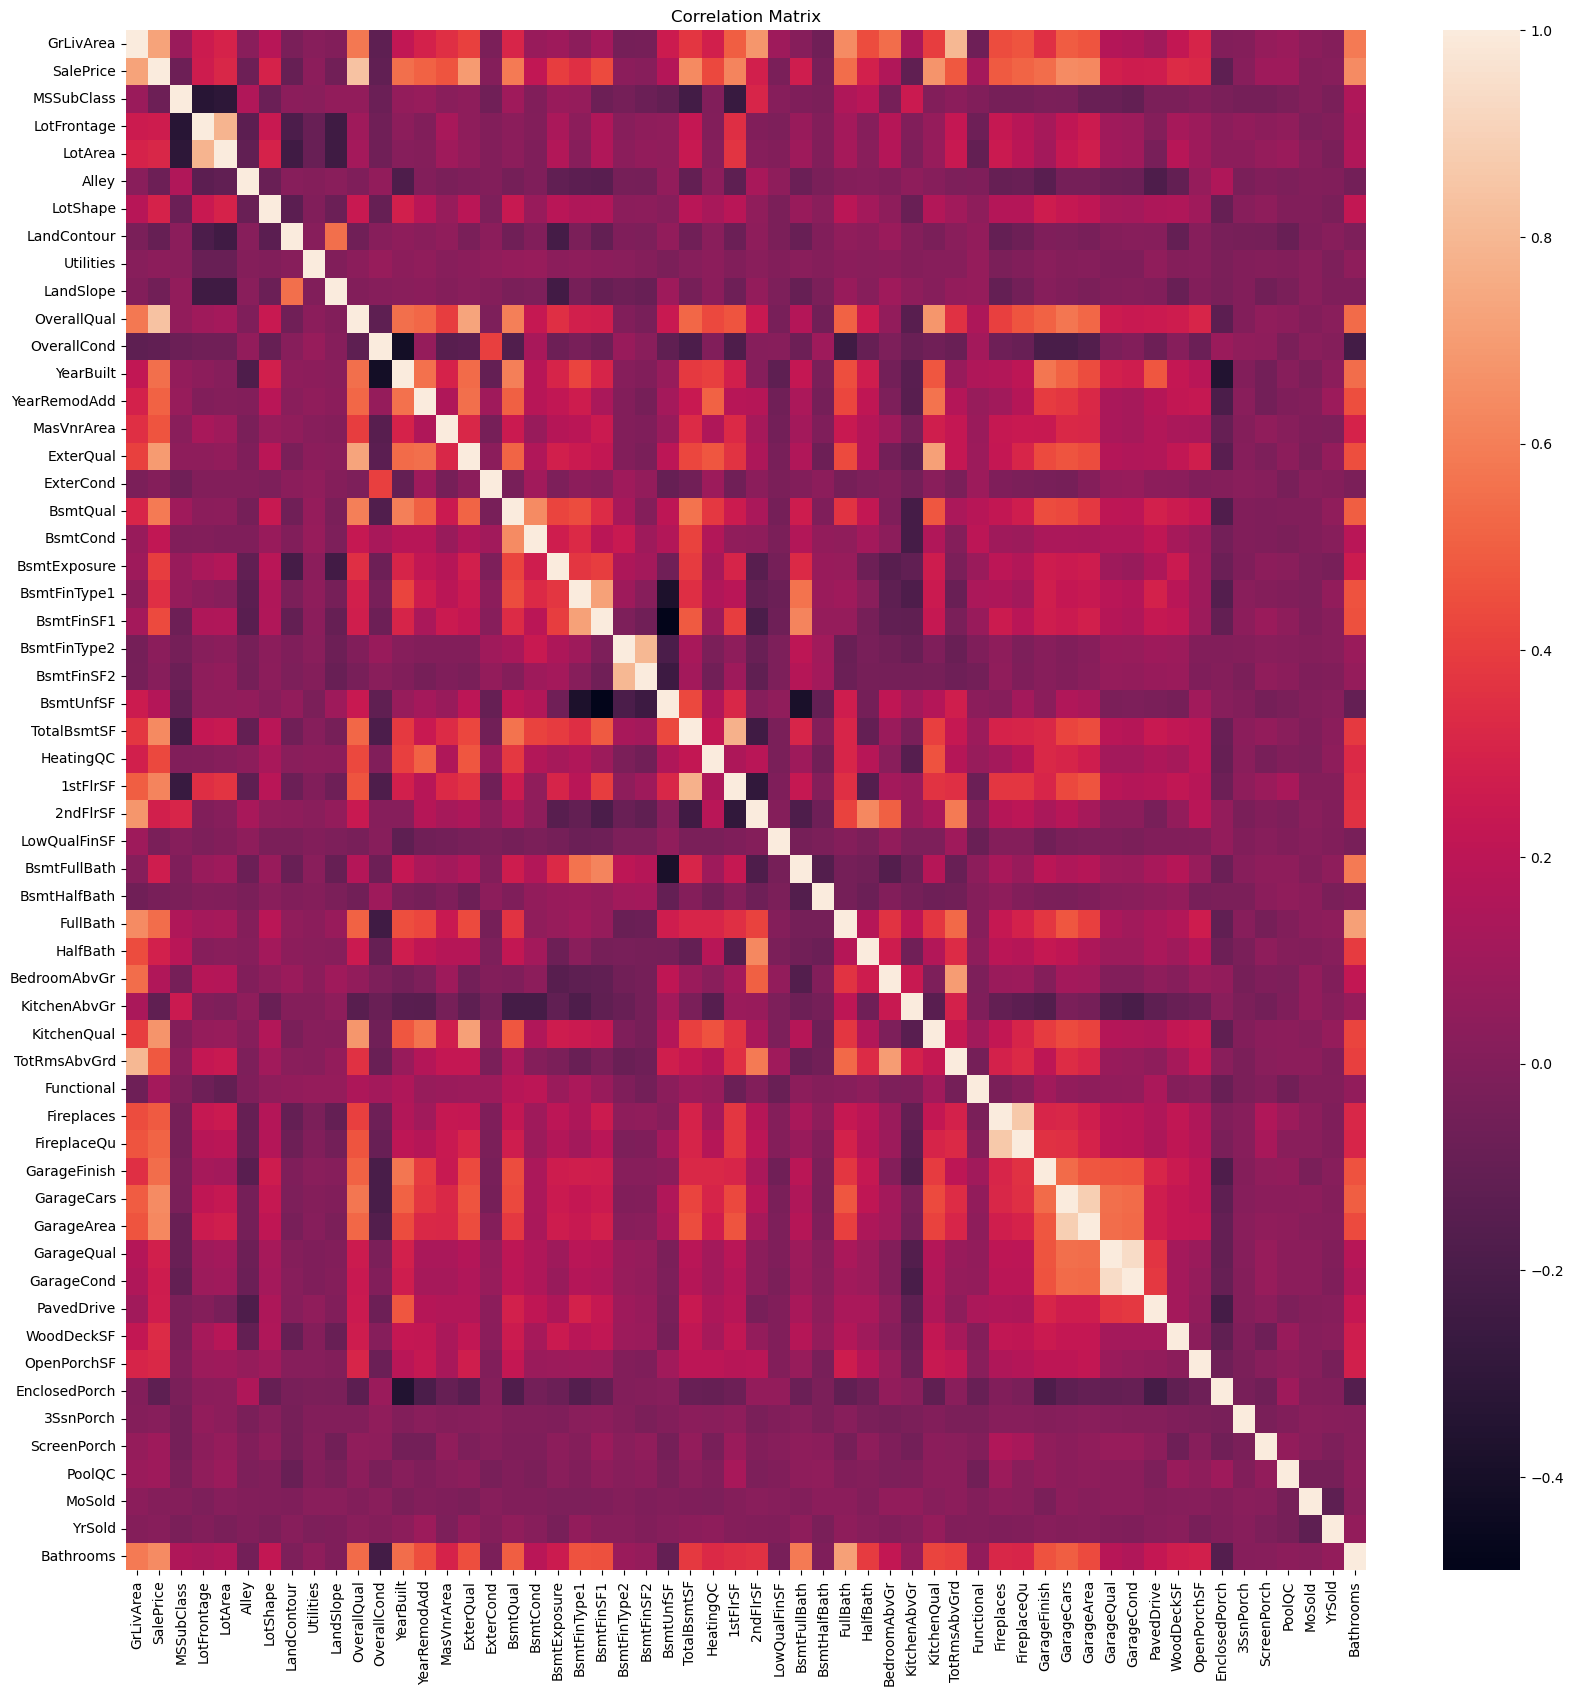

In [79]:
X4_drop = df_normal_quality.drop(['PID'], axis =1).copy()
numerical_columns = numerical_columns_selector(X4_drop)
correlation_matrix = X4_drop[numerical_columns].corr()

# set figure size
plt.figure(figsize=(20,20))

# plot correlation matrix
sns.heatmap(correlation_matrix, annot=False)

# set the title
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 2500x2500 with 0 Axes>

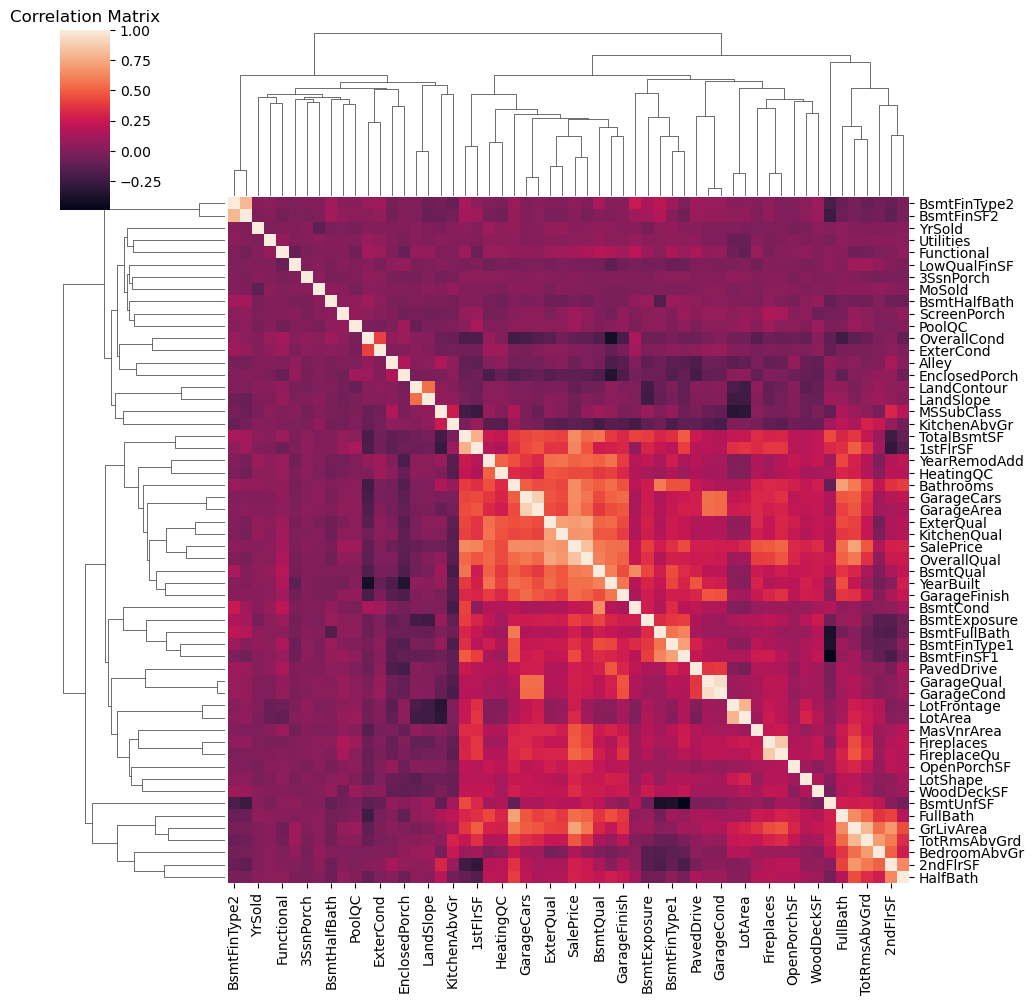

In [65]:
plt.figure(figsize=(25,25))

# plot correlation matrix
sns.clustermap(correlation_matrix, annot=False, yticklabels = True)

# set plot title
plt.title('Correlation Matrix')

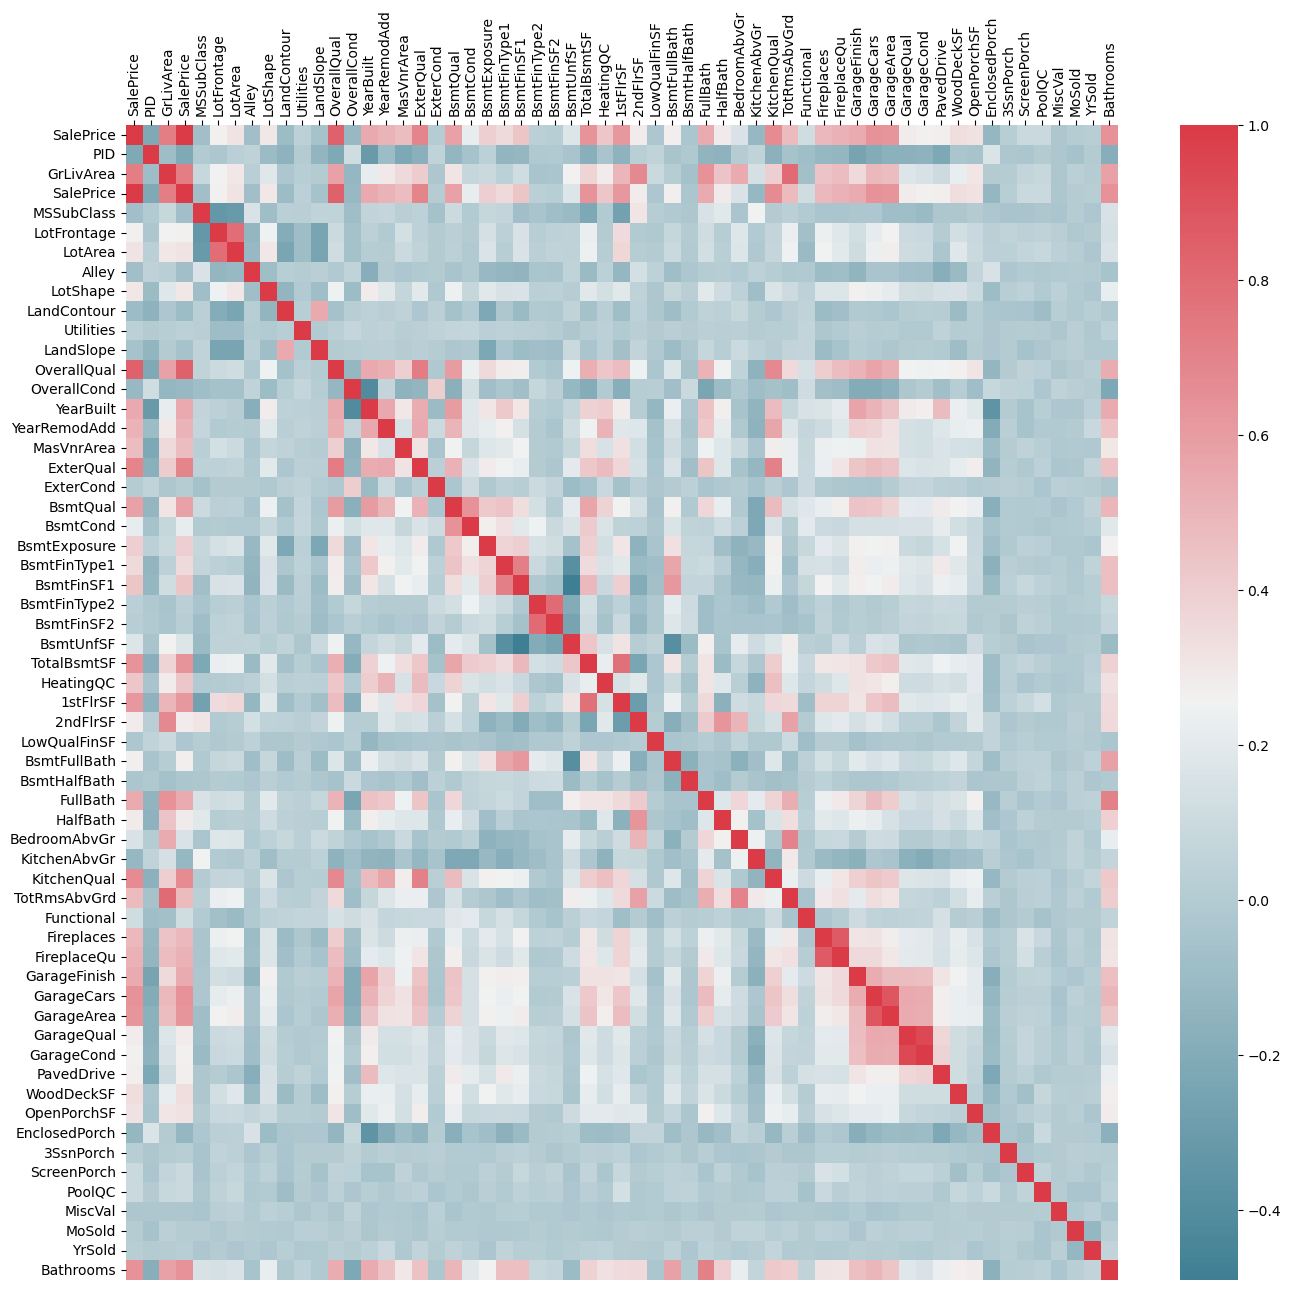

In [32]:
numerical_columns = numerical_columns_selector(df_normal_quality)
corr = df_normal_quality[['SalePrice'] + numerical_columns].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [35]:
X3.columns

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYN',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [159]:
# X3_test = X3[['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'TotalBsmtSF', 
#    'Bathrooms', 'YearBuilt', 'LotArea', 'Neighborhood', 'Foundation', 'GarageType',
#   'MSSubClass']]

X3_test = X3[['GrLivArea', 'MSSubClass', 'MSZoning',  'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual',  'YearBuilt', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure',
       'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYN',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolYN', 'PoolQC', 'Fence', 'MoSold',
       'YrSold', 'SaleType',  'Bathrooms']]


In [160]:
#Columns need to be dropped here in order to avoid multicollinearity
#X3_drop = X3.drop(['1stFlrSF', 'HeatingQC', 'GarageCars', 'ExterQual', 'BsmtQual', 
 #                  'GarageFinish', 'BsmtExposure', 'BsmtFinType1', 'PavedDrive', 'TotalBsmtSF',
  #                 'GarageCond', 'LotFrontage', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
   #                'Bathrooms', 'TotRmsAbvGrd', '2ndFlrSF'], axis =1)


# Preprocessing for ols
kf = KFold(n_splits=5, shuffle=True, random_state=42)

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X3_test)
categorical_columns = categorical_columns_selector(X3_test)

categorical_preprocessor_drop = OneHotEncoder(handle_unknown="ignore", drop= 'first')
numerical_preprocessor = StandardScaler(with_std= False)

preprocessor_drop = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor_drop, categorical_columns),
    ]
)

# pipeline for ols
ols = linear_model.LinearRegression()
ols_pipe = Pipeline(steps=[("Preprocess", preprocessor_drop), ("Ols", ols)])
ols_regr = compose.TransformedTargetRegressor(regressor= ols_pipe,
                                                func=np.log, inverse_func=np.exp)

In [163]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ols_regr, X3_test, y3, cv = 10, error_score= 'raise')
scores.mean()

0.9313988439560784

In [139]:
ols_regr = compose.TransformedTargetRegressor(regressor= ols,
                                                func=np.log, inverse_func=np.exp)
test = pd.DataFrame(preprocessor_drop.fit_transform(X3))
scores = cross_val_score(ols_regr, test, y3, cv = 5, error_score= 'raise')

ValueError: Input contains infinity or a value too large for dtype('float64').

In [127]:
categorical_columns = categorical_columns_selector(X3)
X_encoded = pd.get_dummies(X3, columns = X3[categorical_columns].columns, 
                           drop_first= True, dtype = int)
X_encoded = 

,GrLivArea,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,856,30,62.472926,7890,0.0,1,4,4,3,36,...,0,0,0,0,0,0,0,1,1,0
1,1049,120,42.000000,4235,0.0,1,4,4,3,25,...,0,0,0,0,0,0,0,1,1,0
2,1001,30,60.000000,6060,0.0,1,4,4,3,25,...,0,0,0,0,0,0,0,1,1,0
3,1039,70,80.000000,8146,0.0,1,4,4,3,16,...,0,0,0,0,0,0,0,1,1,0
4,1665,60,70.000000,8400,0.0,1,4,4,3,64,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,952,30,70.105866,8854,0.0,1,4,4,3,36,...,0,0,0,0,0,0,0,1,1,0
2576,1733,20,108.318076,13680,0.0,2,4,4,3,9,...,0,0,0,0,0,0,0,1,1,0
2577,2002,90,82.000000,6270,0.0,1,2,4,3,25,...,0,0,0,0,0,0,0,1,1,0
2578,1842,60,69.884162,8826,0.0,1,4,4,3,49,...,0,0,0,0,0,0,0,1,1,0


# Above is working but I had to pick which variables to use....ok????
I think there is an issue with OneHotEncoding have variables that are not appearing in the 
training then appear in the test dataset 
Is there anyway to actually handle this with mlr?? Why doesn't it just put in 0 not Nan 
I THINK this is what is happening 
There are some varialbes like PoolYN that only have something like 9 yeses so that could make it very confusing in the test set

In [2]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X1)
categorical_columns = categorical_columns_selector(X1)

categorical_preprocessor_drop = OneHotEncoder(handle_unknown="ignore", drop= 'first')
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor_drop = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor_drop, categorical_columns),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

#ridge pipe
ridge = linear_model.Ridge()

ridge_pipe_drop = Pipeline(steps=[("Preprocess", preprocessor_drop), ("Ridge", ridge)])

ridge_pipe = Pipeline(steps=[("Preprocess", preprocessor), ("Ridge", ridge)])


ridge_regr_drop = compose.TransformedTargetRegressor(regressor= ridge_pipe_drop,
                                                func=np.log, inverse_func=np.exp)

ridge_regr = compose.TransformedTargetRegressor(regressor= ridge_pipe,
                                                func=np.log, inverse_func=np.exp)

param_gridR = {
    "regressor__Ridge__alpha": [10, 15, 20, 25, 30] 
}

ridge_search_drop = GridSearchCV(ridge_regr_drop, param_gridR, n_jobs=2, cv = kf)

ridge_search = GridSearchCV(ridge_regr, param_gridR, n_jobs=2, cv = kf)

# lasso pipe
lasso = linear_model.Lasso()
lasso_pipe_drop = Pipeline(steps=[("Preprocess", preprocessor_drop), ("Lasso", lasso)])
lasso_pipe = Pipeline(steps=[("Preprocess", preprocessor), ("Lasso", lasso)])

lasso_regr_drop = compose.TransformedTargetRegressor(regressor= lasso_pipe_drop,
                                                func=np.log, inverse_func=np.exp)
lasso_regr = compose.TransformedTargetRegressor(regressor= lasso_pipe,
                                                func=np.log, inverse_func=np.exp)
param_gridL = {
    "regressor__Lasso__alpha": [0, .01, .001, .0001, .00001] 
}
lasso_search_drop = GridSearchCV(lasso_regr_drop, param_gridL, n_jobs=2, cv = kf)
lasso_search = GridSearchCV(lasso_regr, param_gridL, n_jobs=2, cv = kf)

NameError: name 'X1' is not defined